IMPORTING THE LIBRARIES

In [2]:
import pandas as pd
import numpy as np
from scipy.stats import mode
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

#importing libraries

IMPORTING THE DATASETS

In [3]:
data = pd.read_csv('/Users/ratnameenashivakumar/Downloads/Dataset/Training.csv').dropna(axis=1) #importing the dataset
data.head() # Displaying first 5 values
list(data.columns) #Name of the columns

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


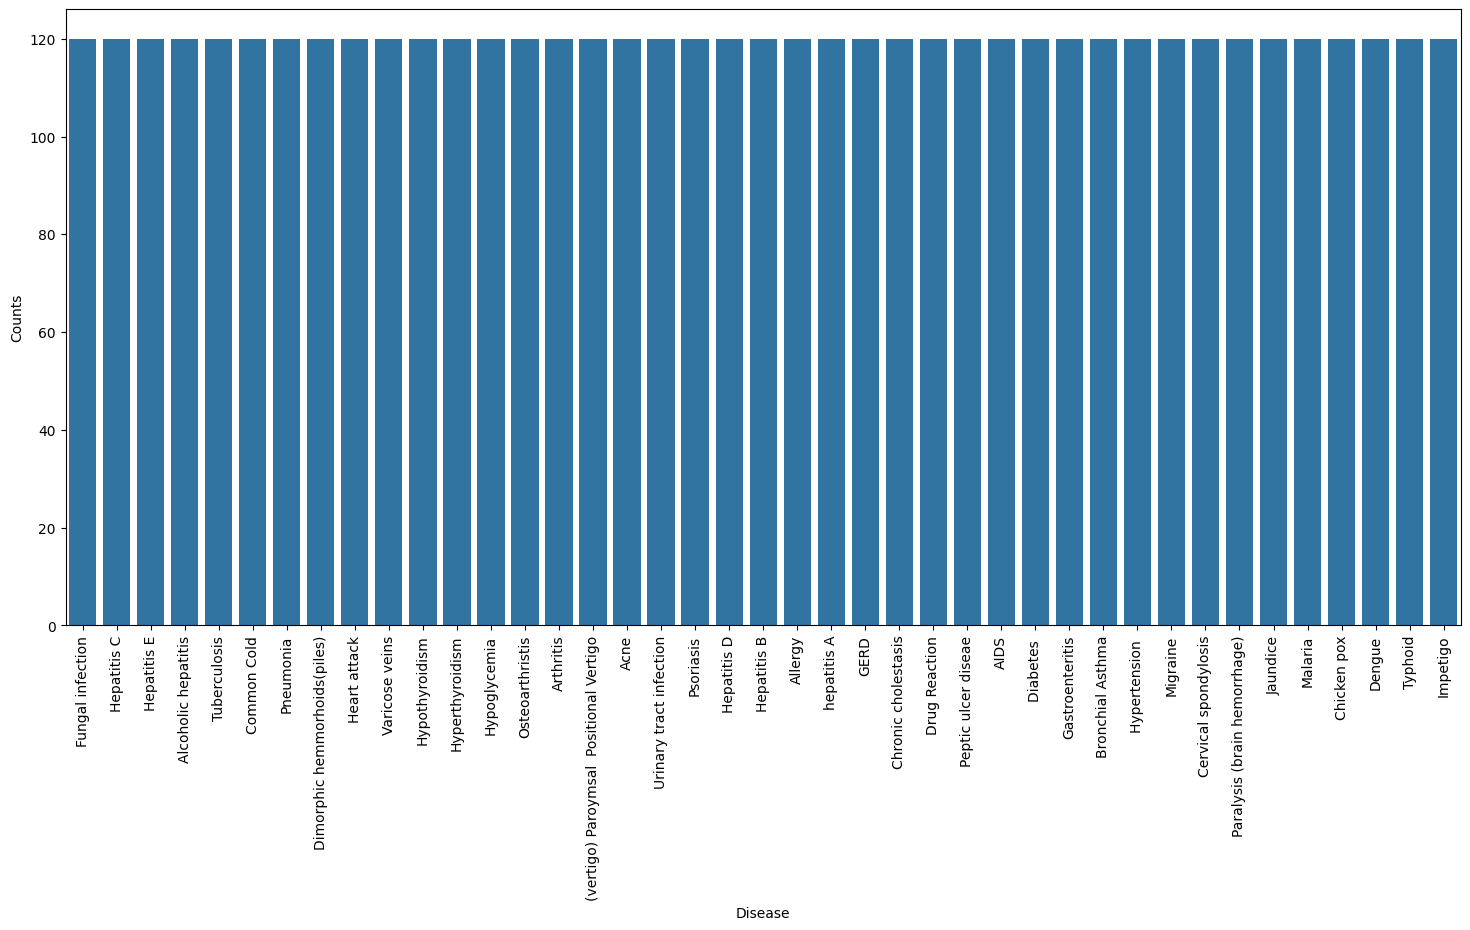

In [7]:
disease_counts = data['prognosis'].value_counts()
temp_df = pd.DataFrame({
    "Disease" : disease_counts.index,
    "Counts" : disease_counts.values
})

plt.figure(figsize= (18,8))
sns.barplot(x="Disease", y="Counts", data = temp_df)
plt.xticks(rotation=90)
plt.show()

In [5]:
column_types = data.dtypes
# Print the column types
print(column_types)

itching                  int64
skin_rash                int64
nodal_skin_eruptions     int64
continuous_sneezing      int64
shivering                int64
                         ...  
inflammatory_nails       int64
blister                  int64
red_sore_around_nose     int64
yellow_crust_ooze        int64
prognosis               object
Length: 133, dtype: object


In [6]:
encoder = LabelEncoder()
data['prognosis'] = encoder.fit_transform(data['prognosis'])

In [7]:
#Splitting the data for training and testing the model
X = data.iloc[:,:-1]
Y = data.iloc[:, -1]
X_train, X_test, Y_train, Y_test =  train_test_split(X, Y, test_size=0.2, random_state=24)
print(f"Train : {X_train.shape}, {Y_train.shape}")
print(f"Test: {X_test.shape} , {Y_test.shape}")

Train : (3936, 132), (3936,)
Test: (984, 132) , (984,)


In [8]:
#K Fold Cross Validation
def cv_scoring(estimator, X, Y):
    return accuracy_score(Y, estimator.predict(X))

models = {
    "SVC" : SVC(),
    "Gaussian NB" : GaussianNB(),
    "Random Forest" : RandomForestClassifier(random_state= 18)
}

for model_name in models:
    model = models[model_name]
    scores = cross_val_score(model, X, Y, cv = 10, n_jobs = -1, scoring= cv_scoring)
    print("=="*30)
    print(model_name)
    print(f"Scores : {scores}")
    print(f"Mean Score: {np.mean(scores)}")

SVC
Scores : [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0
Gaussian NB
Scores : [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0
Random Forest
Scores : [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0


SVM Classifier


Accuracy on training data with SVM Classifier: 100.00%
Accuracy on test data with SVM Classifier: 100.00%


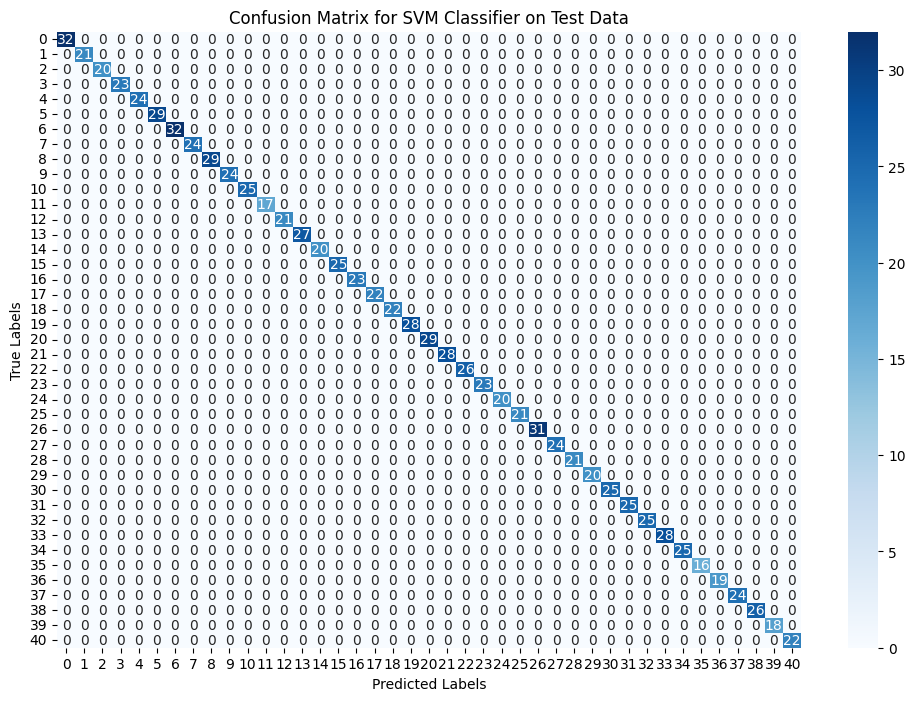

In [15]:
# Train the model
svm_model = SVC()
svm_model.fit(X_train, Y_train)

# Make predictions on the training data
train_preds = svm_model.predict(X_train)
train_accuracy = accuracy_score(Y_train, train_preds) * 100
print(f"Accuracy on training data with SVM Classifier: {train_accuracy:.2f}%")

# Make predictions on the test data
test_preds = svm_model.predict(X_test)
test_accuracy = accuracy_score(Y_test, test_preds) * 100
print(f"Accuracy on test data with SVM Classifier: {test_accuracy:.2f}%")

# Compute and plot confusion matrix
cf_matrix = confusion_matrix(Y_test, test_preds)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix for SVM Classifier on Test Data")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


Naive Bayes Classifier

Accuracy on training data with Naive Bayes Classifier: 100.00%
Accuracy on test data with Naive Bayes Classifier: 100.00%


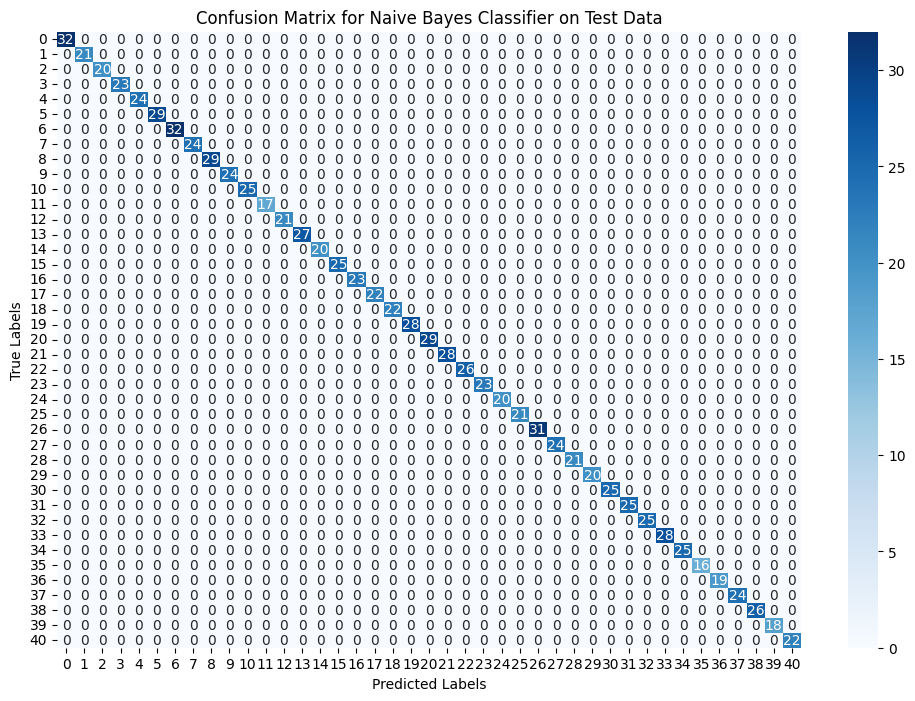

In [18]:
nb_model = GaussianNB()
nb_model.fit(X_train, Y_train)

# Make predictions on the training data
train_preds = nb_model.predict(X_train)
train_accuracy = accuracy_score(Y_train, train_preds) * 100
print(f"Accuracy on training data with Naive Bayes Classifier: {train_accuracy:.2f}%")

# Make predictions on the test data
test_preds = nb_model.predict(X_test)
test_accuracy = accuracy_score(Y_test, test_preds) * 100
print(f"Accuracy on test data with Naive Bayes Classifier: {test_accuracy:.2f}%")

# Compute and plot confusion matrix
cf_matrix = confusion_matrix(Y_test, test_preds)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix for Naive Bayes Classifier on Test Data")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


Random Forest Classifier

Accuracy on training data with Random Forest Classifier: 100.00%
Accuracy on test data with Naive Bayes Classifier: 100.00%


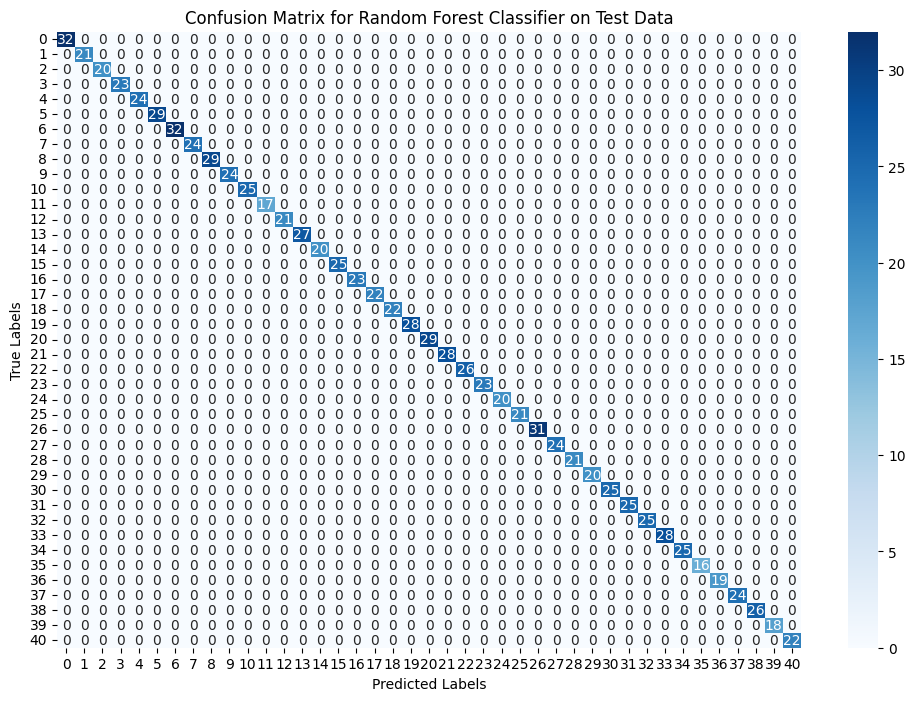

In [20]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, Y_train)

#Make Prediction on train data
train_preds = rf_model.predict(X_train)
train_accuracy = accuracy_score(Y_train, train_preds) * 100
print(f"Accuracy on training data with Random Forest Classifier: {train_accuracy:.2f}%")

#Make Prediction on test data
test_preds = rf_model.predict(X_test)
test_accuracy = accuracy_score(Y_test, test_preds) * 100
print(f"Accuracy on test data with Naive Bayes Classifier: {test_accuracy:.2f}%")

# Compute and plot confusion matrix
cf_matrix = confusion_matrix(Y_test, test_preds)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix for Random Forest Classifier on Test Data")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


Fitting the whole data

In [25]:

# Training the models on whole data
final_svm_model = SVC()
final_nb_model = GaussianNB()
final_rf_model = RandomForestClassifier(random_state=18)

final_svm_model.fit(X, Y)
final_nb_model.fit(X, Y)
final_rf_model.fit(X, Y)

# Reading the test data
test_data = pd.read_csv("./dataset/Testing.csv").dropna(axis=1)

test_X = test_data.iloc[:, :-1]
test_Y = encoder.transform(test_data.iloc[:, -1])  # Ensure encoder matches the one used during training

# Making predictions
svm_preds = final_svm_model.predict(test_X)
nb_preds = final_nb_model.predict(test_X)
rf_preds = final_rf_model.predict(test_X)

# Combining predictions using mode
combined_preds = [mode([i, j, k])[0][0] for i, j, k in zip(svm_preds, nb_preds, rf_preds)]

# Evaluating the combined model
accuracy = accuracy_score(test_Y, combined_preds) * 100
print(f"Accuracy on Test dataset by the combined model: {accuracy:.2f}%")

# Plotting the confusion matrix
cf_matrix = confusion_matrix(test_Y, combined_preds)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix for Combined Model on Test Dataset")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: './dataset/Testing.csv'